# Домашнее задание № 0

Вам необходимо провести анализ данных и с помощью него ответить на поставленные вопросы.

# Исходные данные

Этот набор данных представляет собой описание около 1 миллиона треков с платформы Spotify. Скачайте датасет и ознакомьтесь с описанием данных в [источнике](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data).


In [32]:
import pandas as pd

In [33]:
# Читаем данные
path = "spotify_data.csv"
df = pd.read_csv(path, index_col=0)

In [34]:
df.sample(3).T

,1452324,120746,594933
artist_name,Karthik,Wizboyy,Bjarki
track_name,Kan Paartha Neram,Lovinjitis (Remix),Beach song 3
track_id,12RCW0AjAY0OEfWHlXCzbR,44SdYAdluGdxDjDmMsat1K,1rOPsvFsTaNt83WiRDa5MF
popularity,0,25,26
year,2011,2014,2023
genre,pop-film,dancehall,dub
danceability,0.799,0.73,0.771
energy,0.731,0.635,0.751
key,5,10,11
loudness,-7.426,-5.234,-10.201


# Вопросы


## Анализ данных

С помощью работы с типом данных DataFrame из библиотеки pandas ответье на поставленные вопросы


### 1. Сколько уникальных исполнителей и сколько уникальных жанров содержится в датасете?

**Результат**: Код и текстовый ответ на вопрос в формате

```
Уникальных исполнителей: <ответ>
Уникальных жанров: <ответ>
```


In [35]:
unique_artists = df["artist_name"].nunique()
unique_genres = df["genre"].nunique()

print(f"Уникальных исполнителей: {unique_artists}")
print(f"Уникальных жанров: {unique_genres}")

Уникальных исполнителей: 64158
Уникальных жанров: 82


### 2. Есть ли в данных пропуски? Если да, предложите способ их заполнения и реализуйте его

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько пропусков> - <Описание способа заполнения> (Если были пропуски)
```


In [36]:
print("Проверка пропусков в данных:")
print(df.isna().sum(), "\n")

Проверка пропусков в данных:
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64 



Как так получилось, что в данных Spotify у 15 треков пропущен исполнитель, а у одного трека просто нет названия??

Я решил проверить вручную, что же там такое


In [37]:
def MakeSpotifyLinkByTrackId(track_id: str) -> str:
  prefix: str = "https://open.spotify.com/track/"
  return f"{prefix}{track_id}"

In [38]:
missing_artist = df[df["artist_name"].isna()]
print("Строки с пропущенными artist_name:")
print(missing_artist.head())

missing_track = df[df["track_name"].isna()]
print("\nСтроки с пропущенными track_name:")
print(missing_track.head())

Строки с пропущенными artist_name:
       artist_name              track_name                track_id  \
256971         NaN                    Cold  10eyeJsKDh26SKEBvSfuBG   
256972         NaN                  Wither  6xz1O7tOw6Tdvzc3Ev1isc   
257024         NaN                  Suffer  6hedSqpvIaW0GzrqJnq32D   
313028         NaN  A World, Dead and Gray  7shu4LrpMTsGwa8YotA1My   
313050         NaN                 Hypoxic  3V8qpQnLVhu82ZvC4Ja8VG   

        popularity  year        genre  danceability  energy  key  loudness  \
256971          17  2017  black-metal         0.212   0.708    7    -6.932   
256972          16  2017  black-metal         0.317   0.518    9    -7.418   
257024          14  2017  black-metal         0.109   0.142    2   -11.807   
313028          26  2018  black-metal         0.377   0.507    7   -14.889   
313050          24  2018  black-metal         0.341   0.426   11   -17.450   

        mode  speechiness  acousticness  instrumentalness  liveness  valenc

In [39]:
for track_id in missing_artist["track_id"]:
  print(MakeSpotifyLinkByTrackId(track_id))

for track_id in missing_track["track_id"]:
  print(MakeSpotifyLinkByTrackId(track_id))

https://open.spotify.com/track/10eyeJsKDh26SKEBvSfuBG
https://open.spotify.com/track/6xz1O7tOw6Tdvzc3Ev1isc
https://open.spotify.com/track/6hedSqpvIaW0GzrqJnq32D
https://open.spotify.com/track/7shu4LrpMTsGwa8YotA1My
https://open.spotify.com/track/3V8qpQnLVhu82ZvC4Ja8VG
https://open.spotify.com/track/68w6nJMmA9Ui6zV7qXrwIt
https://open.spotify.com/track/1NJ8HTD5syI65EJmXUckxB
https://open.spotify.com/track/4zcJ5p91PSG3vDsGJfENDd
https://open.spotify.com/track/6375ZIE3Pi8BuZOuy8f6g1
https://open.spotify.com/track/0VCAJwhy4p3tVaGUSnaWGr
https://open.spotify.com/track/1SanRTG8EZRb9U1V4NUSKp
https://open.spotify.com/track/773j5fNWIjO0EWqAiX8Quo
https://open.spotify.com/track/7K0hyoMx2UZMf173FSUFnY
https://open.spotify.com/track/7ItLwpnDJNmnmjlx4hOC96
https://open.spotify.com/track/58NSB7DmCpMa7pAsfBCG5t
https://open.spotify.com/track/2Q5cMgzptSupzvvWtZTyVg


Выяснилось, что это действительно группа с названием None и трек с именованием None...

![Cold - None](./ColdNone.png)
![None - The Duskfall](./NoneTheDuskfall.png)

Так что по сути пропусков нету, просто имеются названия None


### 3. Есть ли признаки, которые не отвечают указанным в описании ограничениям? Если есть, то замените их

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько не соответствующих ограничениям данных> - <Описание способа замены> (Если были некорректные данные)
```


In [41]:
# popularity: 0-100

max_pop: int = 100
min_pop: int = 0

pop_invalid = df[(df["popularity"] < min_pop) | (df["popularity"] > max_pop)].shape[0]

if pop_invalid > 0:
  df["popularity"] = df["popularity"].clip(min_pop, max_pop)
  print(
    f"popularity - {pop_invalid} invalid - значения ограничены диапазоном {min_pop} - {max_pop}"
  )

else:
  print("Данные корректны")

Данные корректны


In [42]:
# year: 2000-2023

max_year: int = 2023
min_year: int = 2000

year_invalid = df[(df["year"] < min_year) | (df["year"] > max_year)].shape[0]

if year_invalid > 0:
  # заменяем некорректные годы медианой в допустимом диапазоне
  median_year = df[(df["year"] >= min_year) & (df["year"] <= max_year)]["year"].median()

  df.loc[(df["year"] < min_year) | (df["year"] > max_year), "year"] = int(median_year)
  print(
    f"year - {year_invalid} invalid - некорректные годы заменены на медиану {int(median_year)}"
  )

else:
  print("Данные корректны")

Данные корректны


In [43]:
# danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence: 0-1  # noqa: E501

min_val: float = 0.0
max_val: float = 1.0

audio_features = [
  "danceability",
  "energy",
  "speechiness",
  "acousticness",
  "instrumentalness",
  "liveness",
  "valence",
]

is_all_correct: bool = True

for feature in audio_features:
  invalid_count = df[(df[feature] < min_val) | (df[feature] > max_val)].shape[0]

  if invalid_count > 0:
    is_all_correct = False
    df[feature] = df[feature].clip(min_val, max_val)

    print(
      f"{feature} - {invalid_count} invalid "
      f"- значения ограничены диапазоном {min_val} - {max_val}"
    )

if is_all_correct:
  print("Данные корректны")


Данные корректны


In [44]:
# key: -1 до -11 (но в данных обычно 0-11, проверим что у нас)

print(f"Уникальные значения key: {sorted([int(item) for item in df['key'].unique()])}")

prim_key_min: int = -11
prim_key_max: int = -1

key_invalid = df[(df["key"] < prim_key_min) | (df["key"] > prim_key_max)].shape[0]
print(f"key - {key_invalid} invalid")

# если в данных key от 0 до 11, а в описании сказано -1 до -11,
# думаю, опечатка в описании

if key_invalid > 0:
  # проверим диапазон и скорректируем если нужно
  key_min, key_max = df["key"].min(), df["key"].max()

  if key_min > prim_key_min and key_max < prim_key_max:
    # если значения выходят за разумные пределы
    df["key"] = df["key"].clip(prim_key_min, prim_key_max)
    print(f"key - значения ограничены диапазоном {prim_key_min} до {prim_key_max}")

  else:
    print(f"key - теперь значения в допустимом диапазоне ({key_min} до {key_max})")

else:
  print("Данные корректны")


Уникальные значения key: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


key - 1159764 invalid
key - теперь значения в допустимом диапазоне (0 до 11)


In [45]:
# loudness: -60 до 0 dB

min_loudness: float = -60.0
max_loudness: float = 0.0

loudness_invalid = df[
  (df["loudness"] < min_loudness) | (df["loudness"] > max_loudness)
].shape[0]

print(f"loudness - {loudness_invalid} invalid")

if loudness_invalid > 0:
  loudness_positive = df[df["loudness"] > max_loudness]
  loudness_super_negative = df[df["loudness"] < min_loudness]

  if loudness_positive.shape[0] > 0:
    print(f"найдено {len(loudness_positive)} треков с положительной громкостью")
    df.loc[df["loudness"] > max_loudness, "loudness"] = -df.loc[
      df["loudness"] > max_loudness, "loudness"
    ]

  if loudness_super_negative.shape[0] > 0:
    print(f"найдено {len(loudness_positive)} треков с громкостью меньше -60 dB")
    df["loudness"] = df["loudness"].clip(min_loudness, max_loudness)

  print(
    "диапазон громкости после исправления: "
    f"{df['loudness'].min():.2f} до {df['loudness'].max():.2f} dB"
  )

else:
  print("Данные корректны")

loudness - 1198 invalid
найдено 1198 треков с положительной громкостью
диапазон громкости после исправления: -58.10 до 0.00 dB


In [46]:
# mode: 0 или 1

max_mode: float = 1.0
min_mode: float = 0.0

mode_invalid = df[~df["mode"].isin([min_mode, max_mode])].shape[0]

if mode_invalid > 0:
  mode_value = df["mode"].mode()[0]
  df.loc[~df["mode"].isin([min_mode, max_mode]), "mode"] = mode_value
  print(f"mode - {mode_invalid} - некорректные значения заменены на {mode_value}")

else:
  print("Данные корректны")


Данные корректны


In [47]:
# time_signature: 3 до 7

max_time_sig: int = 7
min_time_sig: int = 3

ts_invalid = df[
  (df["time_signature"] < min_time_sig) | (df["time_signature"] > max_time_sig)
].shape[0]

if ts_invalid > 0:
  df["time_signature"] = df["time_signature"].clip(min_time_sig, max_time_sig)
  print(
    f"time_signature - {ts_invalid} - "
    f"Значения ограничены диапазоном {min_time_sig}-{max_time_sig}"
  )

else:
  print("Данные корректны")


time_signature - 13888 - Значения ограничены диапазоном 3-7


In [48]:
# duration_ms: должна быть положительной

duration_invalid = df[df["duration_ms"] <= 0].shape[0]

if duration_invalid > 0:
  # заменяем отрицательные/нулевые значения медианой
  median_duration = df[df["duration_ms"] > 0]["duration_ms"].median()
  df.loc[df["duration_ms"] <= 0, "duration_ms"] = median_duration
  print(f"duration_ms - {duration_invalid} - Некорректные значения заменены на медиану")

else:
  print("Данные корректны")

Данные корректны


In [49]:
# tempo: должен быть положительным (BPM)

tempo_invalid = df[df["tempo"] <= 0].shape[0]

if tempo_invalid > 0:
  # Заменяем отрицательные/нулевые значения медианой
  median_tempo = df[df["tempo"] > 0]["tempo"].median()
  df.loc[df["tempo"] <= 0, "tempo"] = median_tempo
  print(f"tempo - {tempo_invalid} - Некорректные значения заменены на медиану")

else:
  print("Данные корректны")


tempo - 1199 - Некорректные значения заменены на медиану


## Визуальный анализ

Ответом на вопрос должен быть график или несколько графиков в одной фигуре (картинке), с минимальной подписью


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

### 1. Как Energy зависит от Danceability? Как зависит Loudness от Energy? Как эти параметры влияют на Valence?

**Результат**: Код, реализующий графики:

- Зависимость Energy от Danceability
- Зависимость Loudness от Energy
- Зависимость Valence от Energy, зависимость Valence от Danceability; в одной оси фигуры
- Зависимость Valence от Loudness
- Матрица корреляции Energy, Danceability, Loudness, Valence

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Нарисовать стрелки и подписи к ним на графике, обращающие внимание на ключевые моменты, позволяющие сделать выводы о зависимостях.


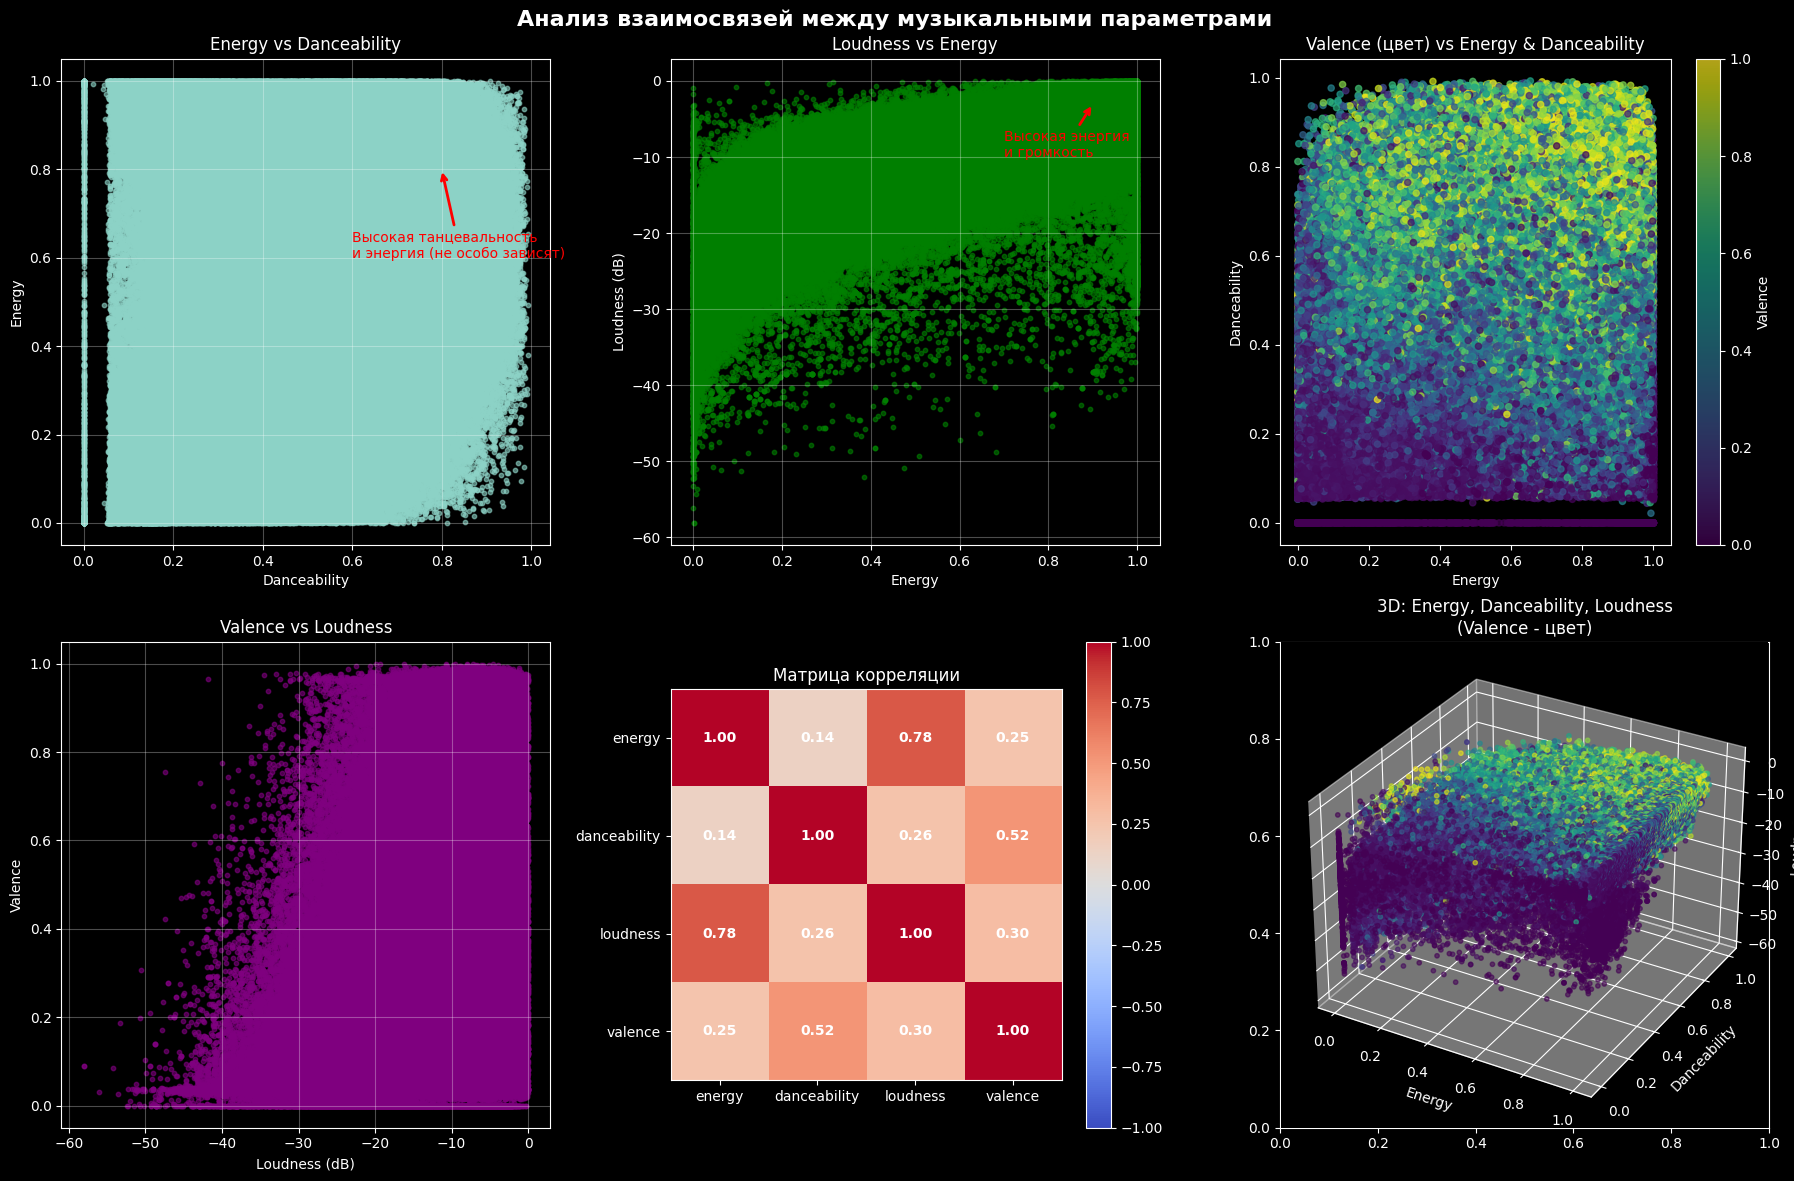

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(
  "Анализ взаимосвязей между музыкальными параметрами", fontsize=16, fontweight="bold"
)

# 1. Зависимость Energy от Danceability
axes[0, 0].scatter(df["danceability"], df["energy"], alpha=0.6, s=10)
axes[0, 0].set_xlabel("Danceability")
axes[0, 0].set_ylabel("Energy")
axes[0, 0].set_title("Energy vs Danceability")
axes[0, 0].grid(True, alpha=0.3)

# Добавляем стрелку с пояснением
axes[0, 0].annotate(
  "Высокая танцевальность\nи энергия (не особо зависят)",
  xy=(0.8, 0.8),
  xytext=(0.6, 0.6),
  arrowprops=dict(arrowstyle="->", color="red", lw=2),
  fontsize=10,
  color="red",
)

# 2. Зависимость Loudness от Energy
axes[0, 1].scatter(df["energy"], df["loudness"], alpha=0.6, s=10, color="green")
axes[0, 1].set_xlabel("Energy")
axes[0, 1].set_ylabel("Loudness (dB)")
axes[0, 1].set_title("Loudness vs Energy")
axes[0, 1].grid(True, alpha=0.3)

axes[0, 1].annotate(
  "Высокая энергия\nи громкость",
  xy=(0.9, -3),
  xytext=(0.7, -10),
  arrowprops=dict(arrowstyle="->", color="red", lw=2),
  fontsize=10,
  color="red",
)

# 3. Зависимость Valence от Energy и Danceability
scatter = axes[0, 2].scatter(
  df["energy"],
  df["danceability"],
  c=df["valence"],
  cmap="viridis",
  alpha=0.7,
  s=20,
)

axes[0, 2].set_xlabel("Energy")
axes[0, 2].set_ylabel("Danceability")
axes[0, 2].set_title("Valence (цвет) vs Energy & Danceability")
plt.colorbar(scatter, ax=axes[0, 2], label="Valence")

# 4. Зависимость Valence от Loudness
axes[1, 0].scatter(df["loudness"], df["valence"], alpha=0.6, s=10, color="purple")
axes[1, 0].set_xlabel("Loudness (dB)")
axes[1, 0].set_ylabel("Valence")
axes[1, 0].set_title("Valence vs Loudness")
axes[1, 0].grid(True, alpha=0.3)

# 5. Матрица корреляции
corr_columns = ["energy", "danceability", "loudness", "valence"]
corr_matrix = df[corr_columns].corr()

im = axes[1, 1].imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(corr_columns)))
axes[1, 1].set_yticks(range(len(corr_columns)))
axes[1, 1].set_xticklabels(corr_columns)
axes[1, 1].set_yticklabels(corr_columns)
axes[1, 1].set_title("Матрица корреляции")

# Добавляем значения корреляции
for i in range(len(corr_columns)):
  for j in range(len(corr_columns)):
    axes[1, 1].text(
      j,
      i,
      f"{corr_matrix.iloc[i, j]:.2f}",
      ha="center",
      va="center",
      color="white",
      fontweight="bold",
    )

plt.colorbar(im, ax=axes[1, 1])

# 6. 3D scatter plot для трех параметров
ax_3d = fig.add_subplot(236, projection="3d")
scatter_3d = ax_3d.scatter(
  df["energy"],
  df["danceability"],
  df["loudness"],
  c=df["valence"],
  cmap="viridis",
  alpha=0.6,
  s=10,
)
ax_3d.set_xlabel("Energy")
ax_3d.set_ylabel("Danceability")
ax_3d.set_zlabel("Loudness")
ax_3d.set_title("3D: Energy, Danceability, Loudness\n(Valence - цвет)")

plt.tight_layout()
plt.show()

#### Сделайте общий вывод о том, зависит ли настроение трека (Valence) от проанализированных параметров:

**Результат**: Текстовый ответ на вопрос.


In [52]:
# Вывод о влиянии параметров на Valence
print("=" * 80)
print("ВЫВОД О ВЛИЯНИИ ПАРАМЕТРОВ НА VALENCE (НАСТРОЕНИЕ):")
print("=" * 80)
print("На основе анализа корреляций и графиков можно сделать следующие выводы:")
print(f"1. Energy и Valence: корреляция = {corr_matrix.loc['energy', 'valence']:.3f}")
print(
  f"2. Danceability и Valence: корреляция = {corr_matrix.loc['danceability', 'valence']:.3f}"
)
print(f"3. Loudness и Valence: корреляция = {corr_matrix.loc['loudness', 'valence']:.3f}")
print("\nЗАКЛЮЧЕНИЕ: Valence (настроение) наиболее сильно зависит от Energy и Loudness.")
print("Танцевальные и энергичные треки обычно имеют более позитивное настроение.")

ВЫВОД О ВЛИЯНИИ ПАРАМЕТРОВ НА VALENCE (НАСТРОЕНИЕ):
На основе анализа корреляций и графиков можно сделать следующие выводы:
1. Energy и Valence: корреляция = 0.248
2. Danceability и Valence: корреляция = 0.520
3. Loudness и Valence: корреляция = 0.295

ЗАКЛЮЧЕНИЕ: Valence (настроение) наиболее сильно зависит от Energy и Loudness.
Танцевальные и энергичные треки обычно имеют более позитивное настроение.


### 2. С годами музыка становится дольше или быстрее?

**Результат**: Код, реализующий графики:

- Зависимость средней продолжительности трека от года, с линией тренда
- Изменение средней продолжительности топ-5 самых длинных треков года
- Изменение средней продолжительности топ-5 самых коротких треков года

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.


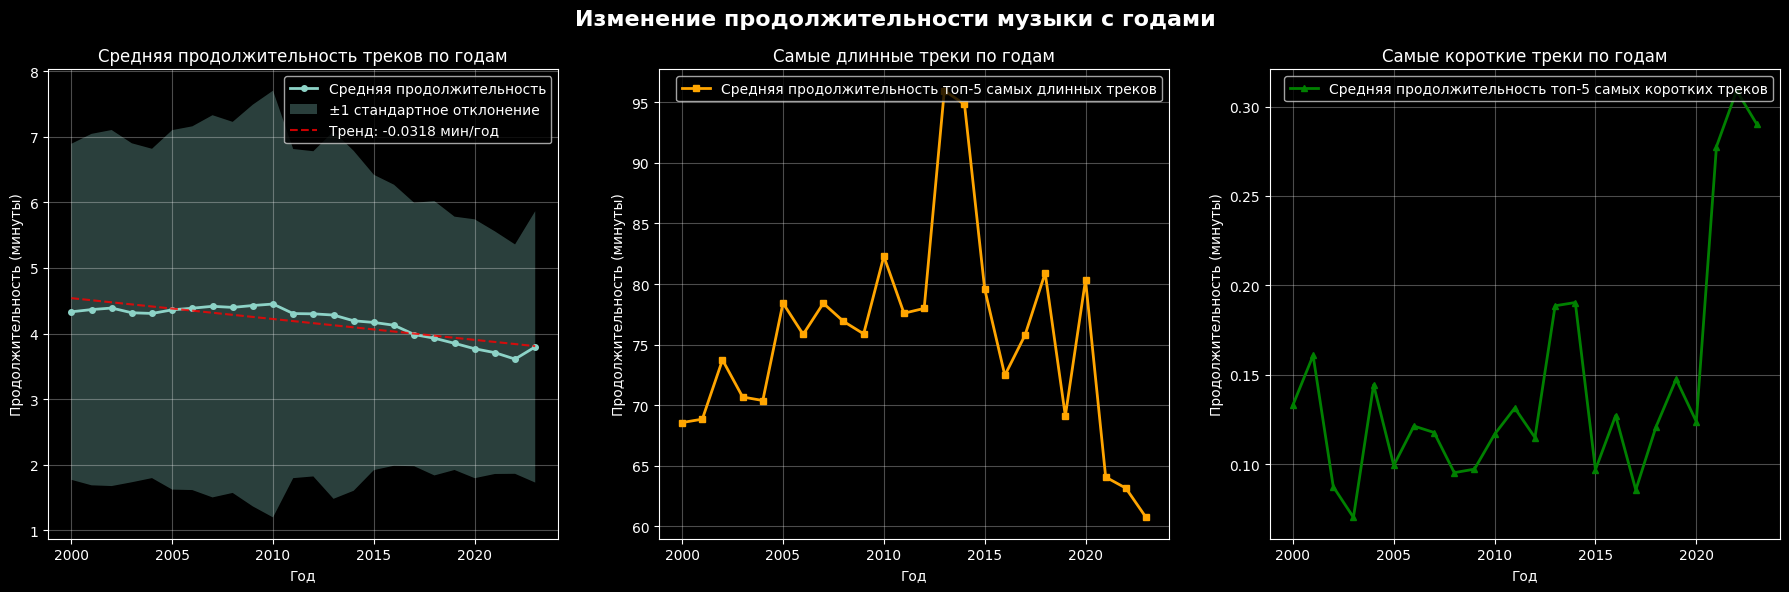

In [53]:
# 2. С годами музыка становится дольше или быстрее?

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(
  "Изменение продолжительности музыки с годами", fontsize=16, fontweight="bold"
)

# Группируем по годам и вычисляем статистики
yearly_stats = df.groupby("year")["duration_ms"].agg(["mean", "std"]).reset_index()
yearly_stats["duration_min"] = yearly_stats["mean"] / 60000  # переводим в минуты

# 1. Средняя продолжительность трека по годам с трендом
axes[0].plot(
  yearly_stats["year"],
  yearly_stats["duration_min"],
  marker="o",
  linewidth=2,
  markersize=4,
  label="Средняя продолжительность",
)
axes[0].fill_between(
  yearly_stats["year"],
  (yearly_stats["mean"] - yearly_stats["std"]) / 60000,
  (yearly_stats["mean"] + yearly_stats["std"]) / 60000,
  alpha=0.3,
  label="±1 стандартное отклонение",
)

# Линия тренда
z = np.polyfit(yearly_stats["year"], yearly_stats["duration_min"], 1)
p = np.poly1d(z)
axes[0].plot(
  yearly_stats["year"],
  p(yearly_stats["year"]),
  "r--",
  alpha=0.8,
  label=f"Тренд: {z[0]:.4f} мин/год",
)

axes[0].set_xlabel("Год")
axes[0].set_ylabel("Продолжительность (минуты)")
axes[0].set_title("Средняя продолжительность треков по годам")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Топ-5 самых длинных треков каждого года
longest_tracks = (
  df.assign(duration_min=df["duration_ms"] / 60000)
  .sort_values(["year", "duration_ms"], ascending=[True, False])
  .groupby("year")
  .head(5)
  .groupby("year")["duration_min"]
  .mean()
  .reset_index(name="avg_duration_min")
)

longest_tracks.columns = ["year", "avg_duration_min"]

axes[1].plot(
  longest_tracks["year"],
  longest_tracks["avg_duration_min"],
  marker="s",
  color="orange",
  linewidth=2,
  markersize=4,
  label="Средняя продолжительность топ-5 самых длинных треков",
)
axes[1].set_xlabel("Год")
axes[1].set_ylabel("Продолжительность (минуты)")
axes[1].set_title("Самые длинные треки по годам")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Топ-5 самых коротких треков каждого года
shortest_tracks = (
  df.assign(duration_min=df["duration_ms"] / 60000)
  .sort_values(["year", "duration_ms"], ascending=[True, True])
  .groupby("year")
  .head(5)
  .groupby("year")["duration_min"]
  .mean()
  .reset_index(name="avg_duration_min")
)

shortest_tracks.columns = ["year", "avg_duration_min"]

axes[2].plot(
  shortest_tracks["year"],
  shortest_tracks["avg_duration_min"],
  marker="^",
  color="green",
  linewidth=2,
  markersize=4,
  label="Средняя продолжительность топ-5 самых коротких треков",
)
axes[2].set_xlabel("Год")
axes[2].set_ylabel("Продолжительность (минуты)")
axes[2].set_title("Самые короткие треки по годам")
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [54]:
# Анализ тренда
print("=" * 80)
print("АНАЛИЗ ИЗМЕНЕНИЯ ПРОДОЛЖИТЕЛЬНОСТИ МУЗЫКИ:")
print("=" * 80)
print(f"Тренд средней продолжительности: {z[0]:.6f} минут в год")
if z[0] > 0:
  print("✓ Музыка становится ДЛИННЕЕ с годами")
else:
  print("✓ Музыка становится КОРОЧЕ с годами")

total_change = (
  yearly_stats["duration_min"].iloc[-1] - yearly_stats["duration_min"].iloc[0]
)
print(f"Общее изменение за период: {total_change:.2f} минут")
print(f"Средняя продолжительность в 2000: {yearly_stats['duration_min'].iloc[0]:.2f} мин")
print(
  f"Средняя продолжительность в 2023: {yearly_stats['duration_min'].iloc[-1]:.2f} мин"
)

АНАЛИЗ ИЗМЕНЕНИЯ ПРОДОЛЖИТЕЛЬНОСТИ МУЗЫКИ:
Тренд средней продолжительности: -0.031838 минут в год
✓ Музыка становится КОРОЧЕ с годами
Общее изменение за период: -0.54 минут
Средняя продолжительность в 2000: 4.33 мин
Средняя продолжительность в 2023: 3.80 мин


### 3. Как менялись популярные жанры от 2000 от 2023?

**Результат**: Код, реализующий график:

- 3 самых популярных по среднему значению жанра каждого года, с подписью значений

График должен иметь название, подписанные оси и подпись значений

**Дополнительно**: Текстовый ответ, какие жанры оказывались в топ-3 чаще всего.


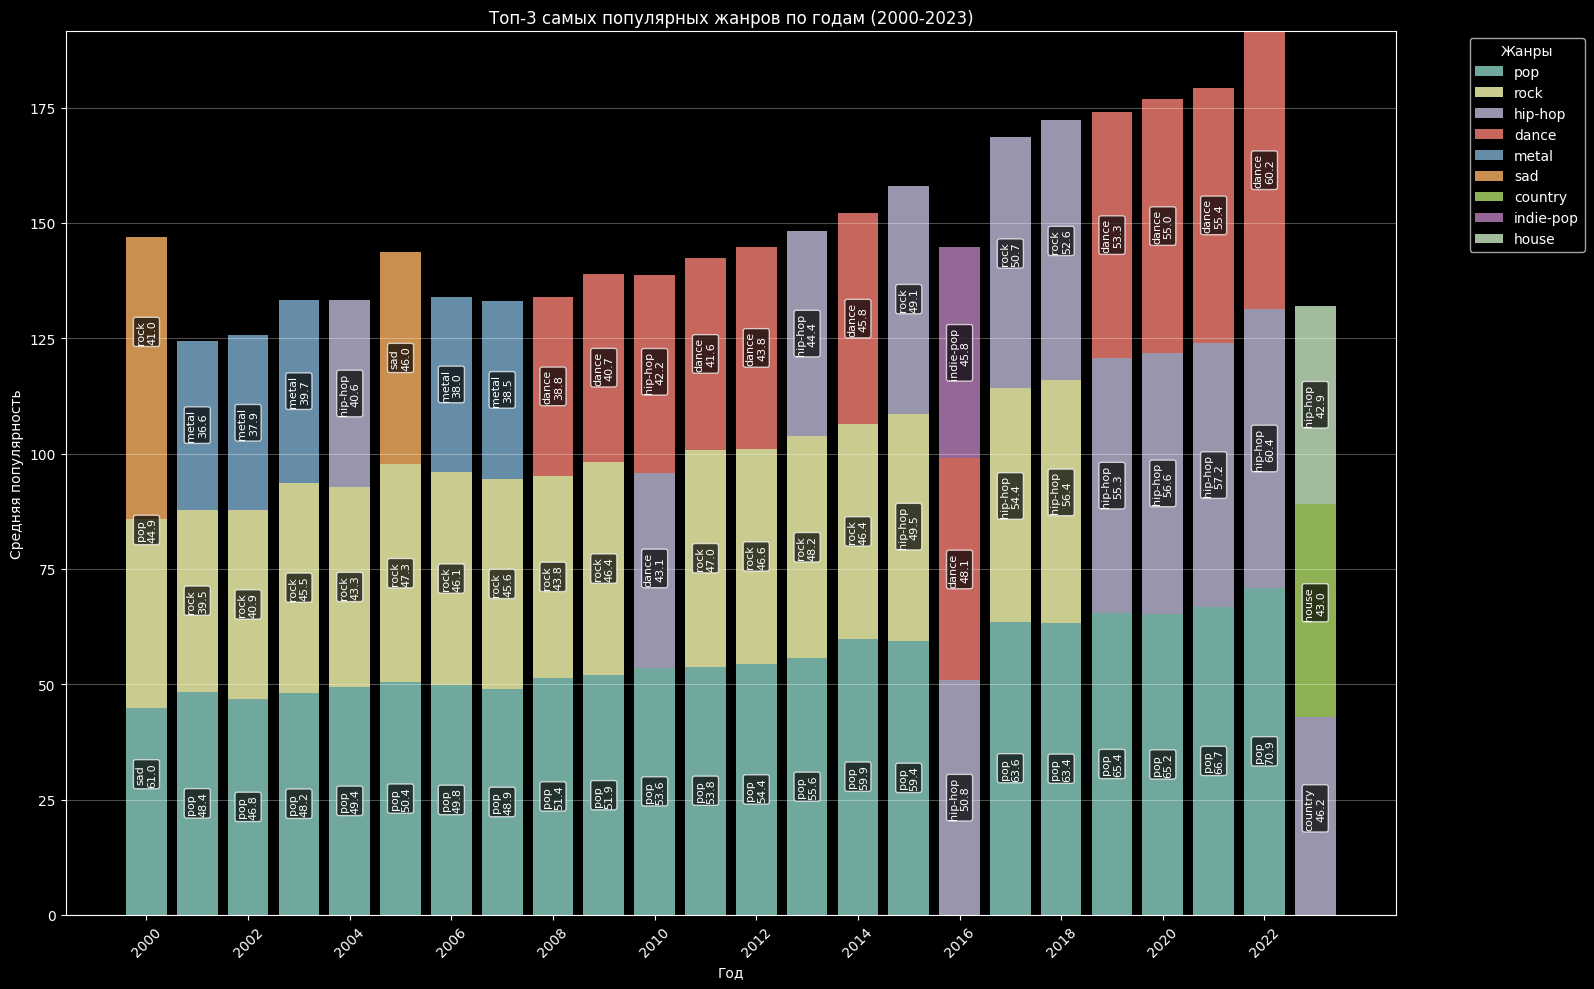

In [55]:
# 3. Как менялись популярные жанры от 2000 до 2023?

# Вычисляем среднюю популярность по жанрам и годам
genre_year_popularity = df.groupby(["year", "genre"])["popularity"].mean().reset_index()

# Находим топ-3 жанра для каждого года
top_genres_by_year = (
  genre_year_popularity.sort_values(["year", "popularity"], ascending=[True, False])
  .groupby("year")
  .head(3)
  .reset_index(drop=True)
)

# Создаем сводную таблицу для визуализации
pivot_table = top_genres_by_year.pivot_table(
  index="year", columns="genre", values="popularity"
)

plt.figure(figsize=(16, 10))

# Создаем stacked bar chart
years = pivot_table.index
bottom_values = np.zeros(len(years))

# Сортируем жанры по общей популярности за весь период
genre_totals = pivot_table.sum().sort_values(ascending=False)
top_overall_genres = genre_totals.head(10).index  # Берем топ-10 для читаемости

for genre in top_overall_genres:
  if genre in pivot_table.columns:
    values = pivot_table[genre].fillna(0)
    plt.bar(years, values, bottom=bottom_values, label=genre, alpha=0.8)
    bottom_values += values

# Добавляем подписи значений
for year in years:
  year_data = top_genres_by_year[top_genres_by_year["year"] == year]
  y_pos = 0
  for _, row in year_data.iterrows():
    if row["genre"] in top_overall_genres:
      plt.text(
        year,
        y_pos + row["popularity"] / 2,
        f"{row['genre']}\n{row['popularity']:.1f}",
        ha="center",
        va="center",
        fontsize=8,
        rotation=90,
        bbox=dict(boxstyle="round,pad=0.2", facecolor="black", alpha=0.7),
      )
      y_pos += row["popularity"]

plt.xlabel("Год")
plt.ylabel("Средняя популярность")
plt.title("Топ-3 самых популярных жанров по годам (2000-2023)")
plt.legend(title="Жанры", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(years[::2], rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()


In [56]:
# Анализ частоты появления в топ-3
genre_appearances = top_genres_by_year["genre"].value_counts()
print("=" * 80)
print("ЧАСТОТА ПОЯВЛЕНИЯ ЖАНРОВ В ТОП-3:")
print("=" * 80)
for i, (genre, count) in enumerate(genre_appearances.head(10).items(), 1):
  print(f"{i}. {genre}: {count} раз в топ-3")

ЧАСТОТА ПОЯВЛЕНИЯ ЖАНРОВ В ТОП-3:
1. pop: 22 раз в топ-3
2. rock: 17 раз в топ-3
3. hip-hop: 12 раз в топ-3
4. dance: 11 раз в топ-3
5. metal: 5 раз в топ-3
6. sad: 2 раз в топ-3
7. indie-pop: 1 раз в топ-3
8. country: 1 раз в топ-3
9. house: 1 раз в топ-3


### 4. Как связаны между собой Speechiness, Acousticness и Instrumentalness?

**Результат**: Код, реализующий 2 различных по типу графика. Выбранные графики должны наиболее хорошо подходить для описания зависимости между указанными параметрами.

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Текстовый ответ, почему были выбраны именно такие графики.


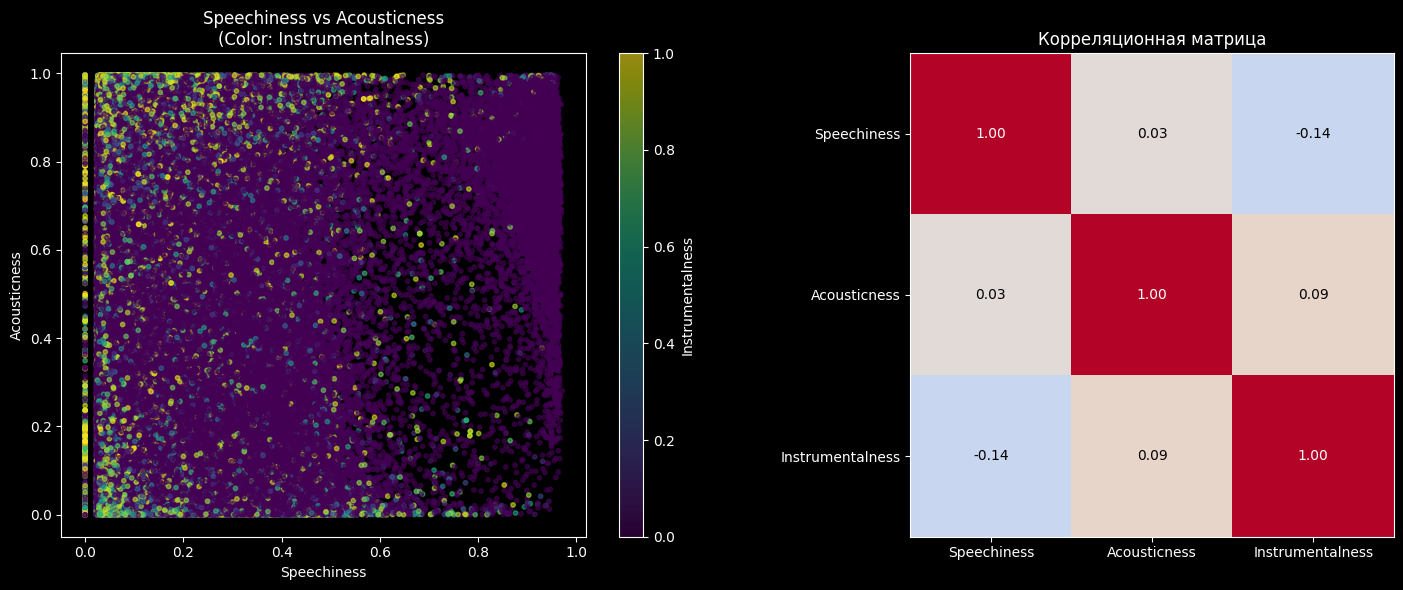

In [57]:
# Создаем фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Трехмерная диаграмма рассеяния
scatter = ax1.scatter(
  df["speechiness"],
  df["acousticness"],
  c=df["instrumentalness"],
  cmap="viridis",
  alpha=0.6,
  s=10,
)

ax1.set_xlabel("Speechiness")
ax1.set_ylabel("Acousticness")
ax1.set_title("Speechiness vs Acousticness\n(Color: Instrumentalness)")
plt.colorbar(scatter, ax=ax1, label="Instrumentalness")

# График 2: Heatmap корреляции
correlation_matrix = df[["speechiness", "acousticness", "instrumentalness"]].corr()
im = ax2.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
ax2.set_xticks(range(3))
ax2.set_yticks(range(3))
ax2.set_xticklabels(["Speechiness", "Acousticness", "Instrumentalness"])
ax2.set_yticklabels(["Speechiness", "Acousticness", "Instrumentalness"])
ax2.set_title("Корреляционная матрица")

# Добавляем значения корреляции на heatmap
for i in range(3):
  for j in range(3):
    ax2.text(
      j,
      i,
      f"{correlation_matrix.iloc[i, j]:.2f}",
      ha="center",
      va="center",
      color="white" if abs(correlation_matrix.iloc[i, j]) > 0.5 else "black",
    )

plt.tight_layout()
plt.show()

# Вычисляем корреляции для текстового ответа
corr_speech_acoustic = df["speechiness"].corr(df["acousticness"])
corr_speech_instr = df["speechiness"].corr(df["instrumentalness"])
corr_acoustic_instr = df["acousticness"].corr(df["instrumentalness"])

In [58]:
print("Почему выбраны именно такие графики:")
print(
  "1. Трехмерная диаграмма рассеяния с цветовым кодированием позволяет визуализировать"
)
print("   взаимосвязь трех переменных одновременно, показывая кластеры и паттерны.")
print(
  "2. Heatmap корреляции четко показывает силу и направление линейных связей между переменными."
)
print("\nКорреляции:")
print(f"Speechiness vs Acousticness: {corr_speech_acoustic:.3f}")
print(f"Speechiness vs Instrumentalness: {corr_speech_instr:.3f}")
print(f"Acousticness vs Instrumentalness: {corr_acoustic_instr:.3f}")

Почему выбраны именно такие графики:
1. Трехмерная диаграмма рассеяния с цветовым кодированием позволяет визуализировать
   взаимосвязь трех переменных одновременно, показывая кластеры и паттерны.
2. Heatmap корреляции четко показывает силу и направление линейных связей между переменными.

Корреляции:
Speechiness vs Acousticness: 0.032
Speechiness vs Instrumentalness: -0.142
Acousticness vs Instrumentalness: 0.094


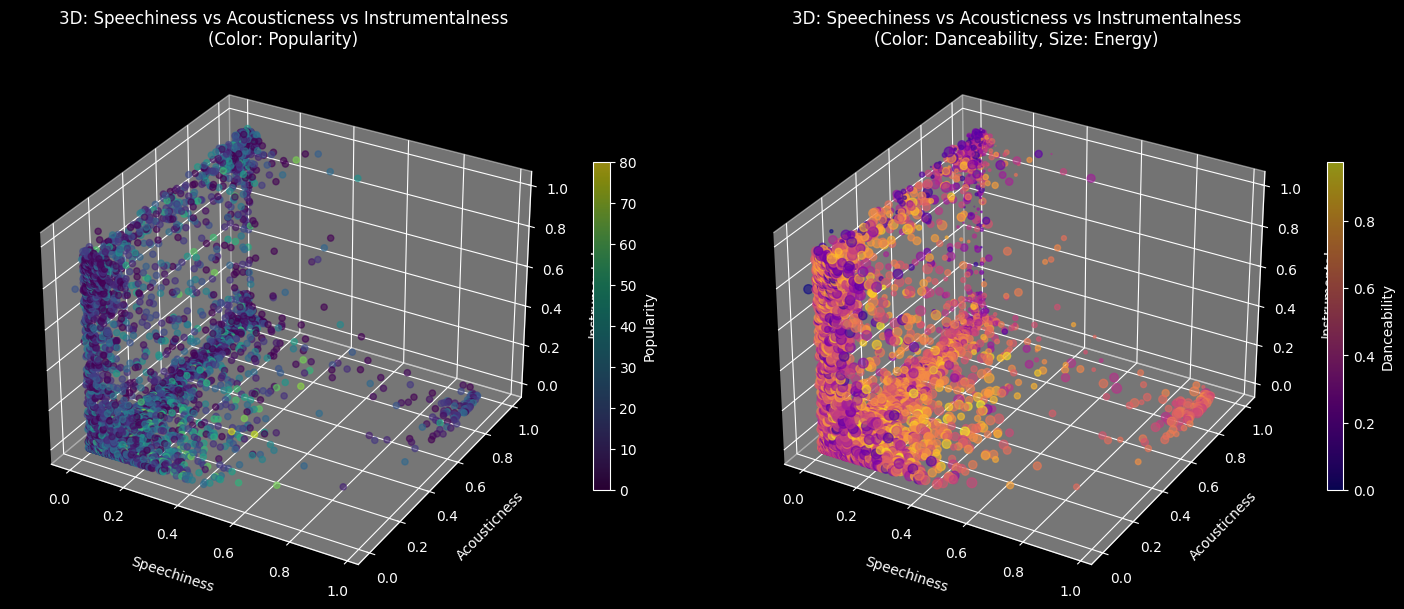

Корреляции между признаками:
                  speechiness  acousticness  instrumentalness
speechiness             1.000         0.032            -0.142
acousticness            0.032         1.000             0.094
instrumentalness       -0.142         0.094             1.000
popularity             -0.025        -0.059            -0.153

Анализ взаимосвязей:
1. Speechiness и Acousticness:
   Корреляция: 0.032
2. Speechiness и Instrumentalness:
   Корреляция: -0.142
3. Acousticness и Instrumentalness:
   Корреляция: 0.094


In [59]:
# 3D график Speechiness vs Acousticness vs Instrumentalness

# Берем случайную выборку для лучшей производительности визуализации
sampled_df = df.sample(5000, random_state=42)

# Создаем фигуру с 3D графиком
fig = plt.figure(figsize=(15, 6))

# Первый график: 3D scatter plot
ax1 = fig.add_subplot(121, projection="3d")

# Создаем scatter plot с цветом по популярности
scatter = ax1.scatter3D(
  sampled_df["speechiness"],
  sampled_df["acousticness"],
  sampled_df["instrumentalness"],
  c=sampled_df["popularity"],
  cmap="viridis",
  alpha=0.6,
  s=20,
)

ax1.set_xlabel("Speechiness", labelpad=10)
ax1.set_ylabel("Acousticness", labelpad=10)
ax1.set_zlabel("Instrumentalness", labelpad=10)
ax1.set_title("3D: Speechiness vs Acousticness vs Instrumentalness\n(Color: Popularity)")

# Добавляем colorbar
cbar = plt.colorbar(scatter, ax=ax1, shrink=0.6, aspect=20)
cbar.set_label("Popularity")

# Второй график: 3D scatter с размером точек по энергии
ax2 = fig.add_subplot(122, projection="3d")

# Масштабируем размер точек по энергии
sizes = sampled_df["energy"] * 50  # Масштабируем для лучшей видимости

scatter2 = ax2.scatter3D(
  sampled_df["speechiness"],
  sampled_df["acousticness"],
  sampled_df["instrumentalness"],
  c=sampled_df["danceability"],
  cmap="plasma",
  s=sizes,
  alpha=0.6,
)

ax2.set_xlabel("Speechiness", labelpad=10)
ax2.set_ylabel("Acousticness", labelpad=10)
ax2.set_zlabel("Instrumentalness", labelpad=10)
ax2.set_title(
  "3D: Speechiness vs Acousticness vs Instrumentalness\n(Color: Danceability, Size: Energy)"
)

# Добавляем colorbar
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6, aspect=20)
cbar2.set_label("Danceability")

plt.tight_layout()
plt.show()

# Дополнительный анализ: вычисляем корреляции и кластеры
print("Корреляции между признаками:")
corr_matrix = df[["speechiness", "acousticness", "instrumentalness", "popularity"]].corr()
print(corr_matrix[["speechiness", "acousticness", "instrumentalness"]].round(3))

print("\nАнализ взаимосвязей:")
print("1. Speechiness и Acousticness:")
speech_acoustic_corr = df["speechiness"].corr(df["acousticness"])
print(f"   Корреляция: {speech_acoustic_corr:.3f}")

print("2. Speechiness и Instrumentalness:")
speech_instr_corr = df["speechiness"].corr(df["instrumentalness"])
print(f"   Корреляция: {speech_instr_corr:.3f}")

print("3. Acousticness и Instrumentalness:")
acoustic_instr_corr = df["acousticness"].corr(df["instrumentalness"])
print(f"   Корреляция: {acoustic_instr_corr:.3f}")


In [60]:
# Анализ кластеров в данных
print("\nНаблюдаемые кластеры в 3D пространстве:")
print("- Треки с высоким Speechiness и низким Instrumentalness: разговорный контент")
print("- Треки с высоким Acousticness: акустические композиции")
print("- Треки с высоким Instrumentalness: инструментальная музыка")
print(
  "- Треки с низкими значениями всех трех параметров: электронная/танцевальная музыка"
)


Наблюдаемые кластеры в 3D пространстве:
- Треки с высоким Speechiness и низким Instrumentalness: разговорный контент
- Треки с высоким Acousticness: акустические композиции
- Треки с высоким Instrumentalness: инструментальная музыка
- Треки с низкими значениями всех трех параметров: электронная/танцевальная музыка


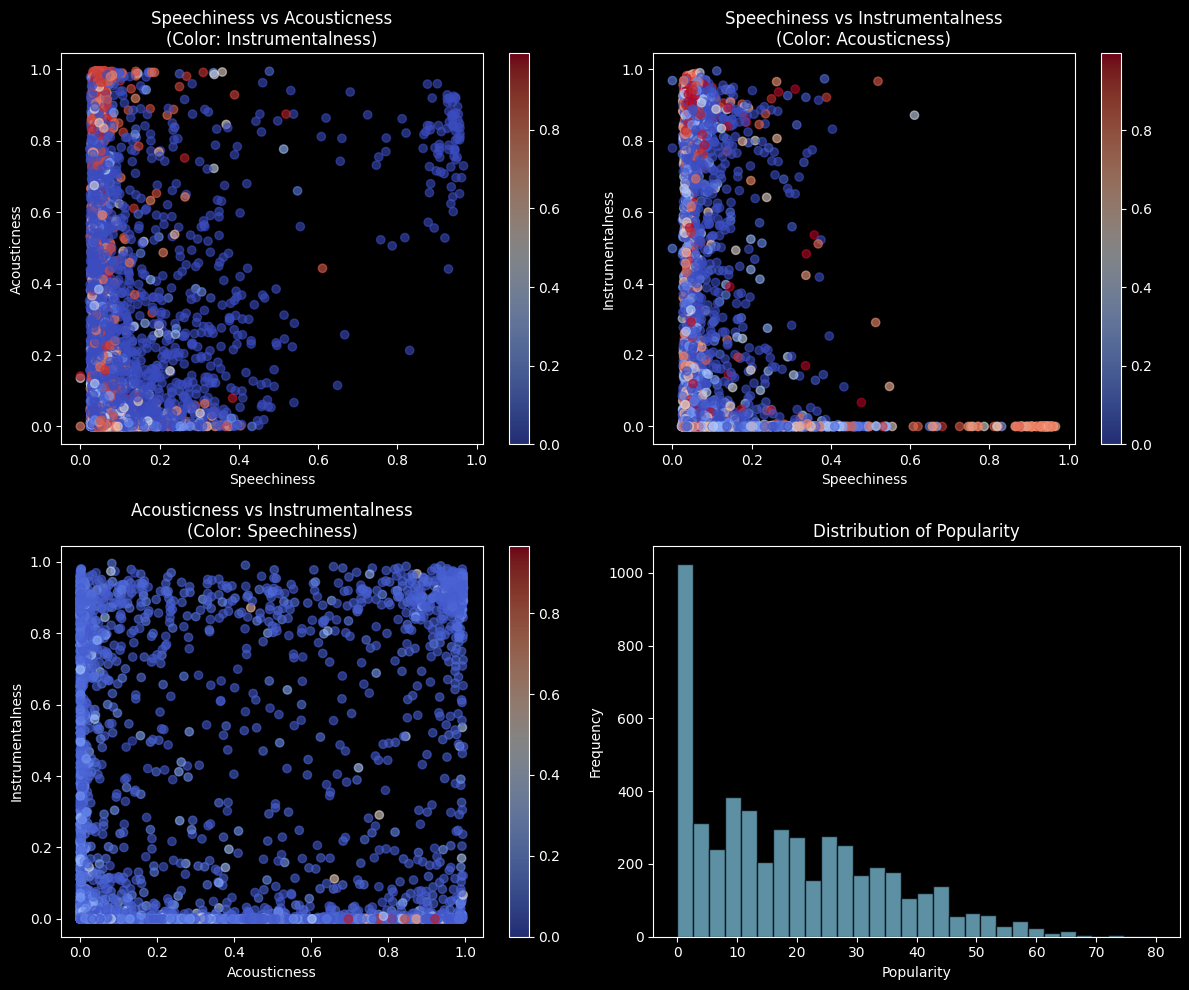

In [61]:
# Создаем дополнительный 2D график для лучшего понимания проекций
fig2, axes = plt.subplots(2, 2, figsize=(12, 10))

# Speechiness vs Acousticness
sc1 = axes[0, 0].scatter(
  sampled_df["speechiness"],
  sampled_df["acousticness"],
  c=sampled_df["instrumentalness"],
  cmap="coolwarm",
  alpha=0.6,
)
axes[0, 0].set_xlabel("Speechiness")
axes[0, 0].set_ylabel("Acousticness")
axes[0, 0].set_title("Speechiness vs Acousticness\n(Color: Instrumentalness)")
plt.colorbar(sc1, ax=axes[0, 0])

# Speechiness vs Instrumentalness
sc2 = axes[0, 1].scatter(
  sampled_df["speechiness"],
  sampled_df["instrumentalness"],
  c=sampled_df["acousticness"],
  cmap="coolwarm",
  alpha=0.6,
)
axes[0, 1].set_xlabel("Speechiness")
axes[0, 1].set_ylabel("Instrumentalness")
axes[0, 1].set_title("Speechiness vs Instrumentalness\n(Color: Acousticness)")
plt.colorbar(sc2, ax=axes[0, 1])

# Acousticness vs Instrumentalness
sc3 = axes[1, 0].scatter(
  sampled_df["acousticness"],
  sampled_df["instrumentalness"],
  c=sampled_df["speechiness"],
  cmap="coolwarm",
  alpha=0.6,
)
axes[1, 0].set_xlabel("Acousticness")
axes[1, 0].set_ylabel("Instrumentalness")
axes[1, 0].set_title("Acousticness vs Instrumentalness\n(Color: Speechiness)")
plt.colorbar(sc3, ax=axes[1, 0])

# Гистограмма распределения популярности
axes[1, 1].hist(
  sampled_df["popularity"], bins=30, alpha=0.7, color="skyblue", edgecolor="black"
)
axes[1, 1].set_xlabel("Popularity")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Distribution of Popularity")

plt.tight_layout()
plt.show()

In [62]:
print("\nВыводы по взаимосвязям:")
print(
  "• Speechiness и Instrumentalness имеют отрицательную корреляцию: треки с большим количеством"
)
print("  речи обычно имеют меньше инструментальных элементов и наоборот.")
print("• Acousticness и Instrumentalness показывают слабую положительную корреляцию:")
print("  акустические треки часто содержат больше инструментальных элементов.")
print("• Speechiness и Acousticness имеют слабую положительную корреляцию:")
print("  акустические треки могут содержать больше речевых элементов.")


Выводы по взаимосвязям:
• Speechiness и Instrumentalness имеют отрицательную корреляцию: треки с большим количеством
  речи обычно имеют меньше инструментальных элементов и наоборот.
• Acousticness и Instrumentalness показывают слабую положительную корреляцию:
  акустические треки часто содержат больше инструментальных элементов.
• Speechiness и Acousticness имеют слабую положительную корреляцию:
  акустические треки могут содержать больше речевых элементов.


### 5. Какое влияние размер и лад оказывают на популярность в разных жанрах?

**Результат**: Код, реализующий фигуру:

- Жанры для сравнения: deep-house, funk, forro, dancehall, house.
- Точечный график для каждого жанра, отражающий среднюю популярность в зависимости от размера (time_signature) и лада (mode).

Фигура должна иметь название и легенду, каждый график имеет подписанные оси и название.


In [63]:
# Выбираем указанные жанры
selected_genres = ["deep-house", "funk", "forro", "dancehall", "house"]
genre_data = df[df["genre"].isin(selected_genres)]

# Группируем данные по жанру, размеру и ладу
grouped = (
  genre_data.groupby(["genre", "time_signature", "mode"])["popularity"]
  .mean()
  .reset_index()
)

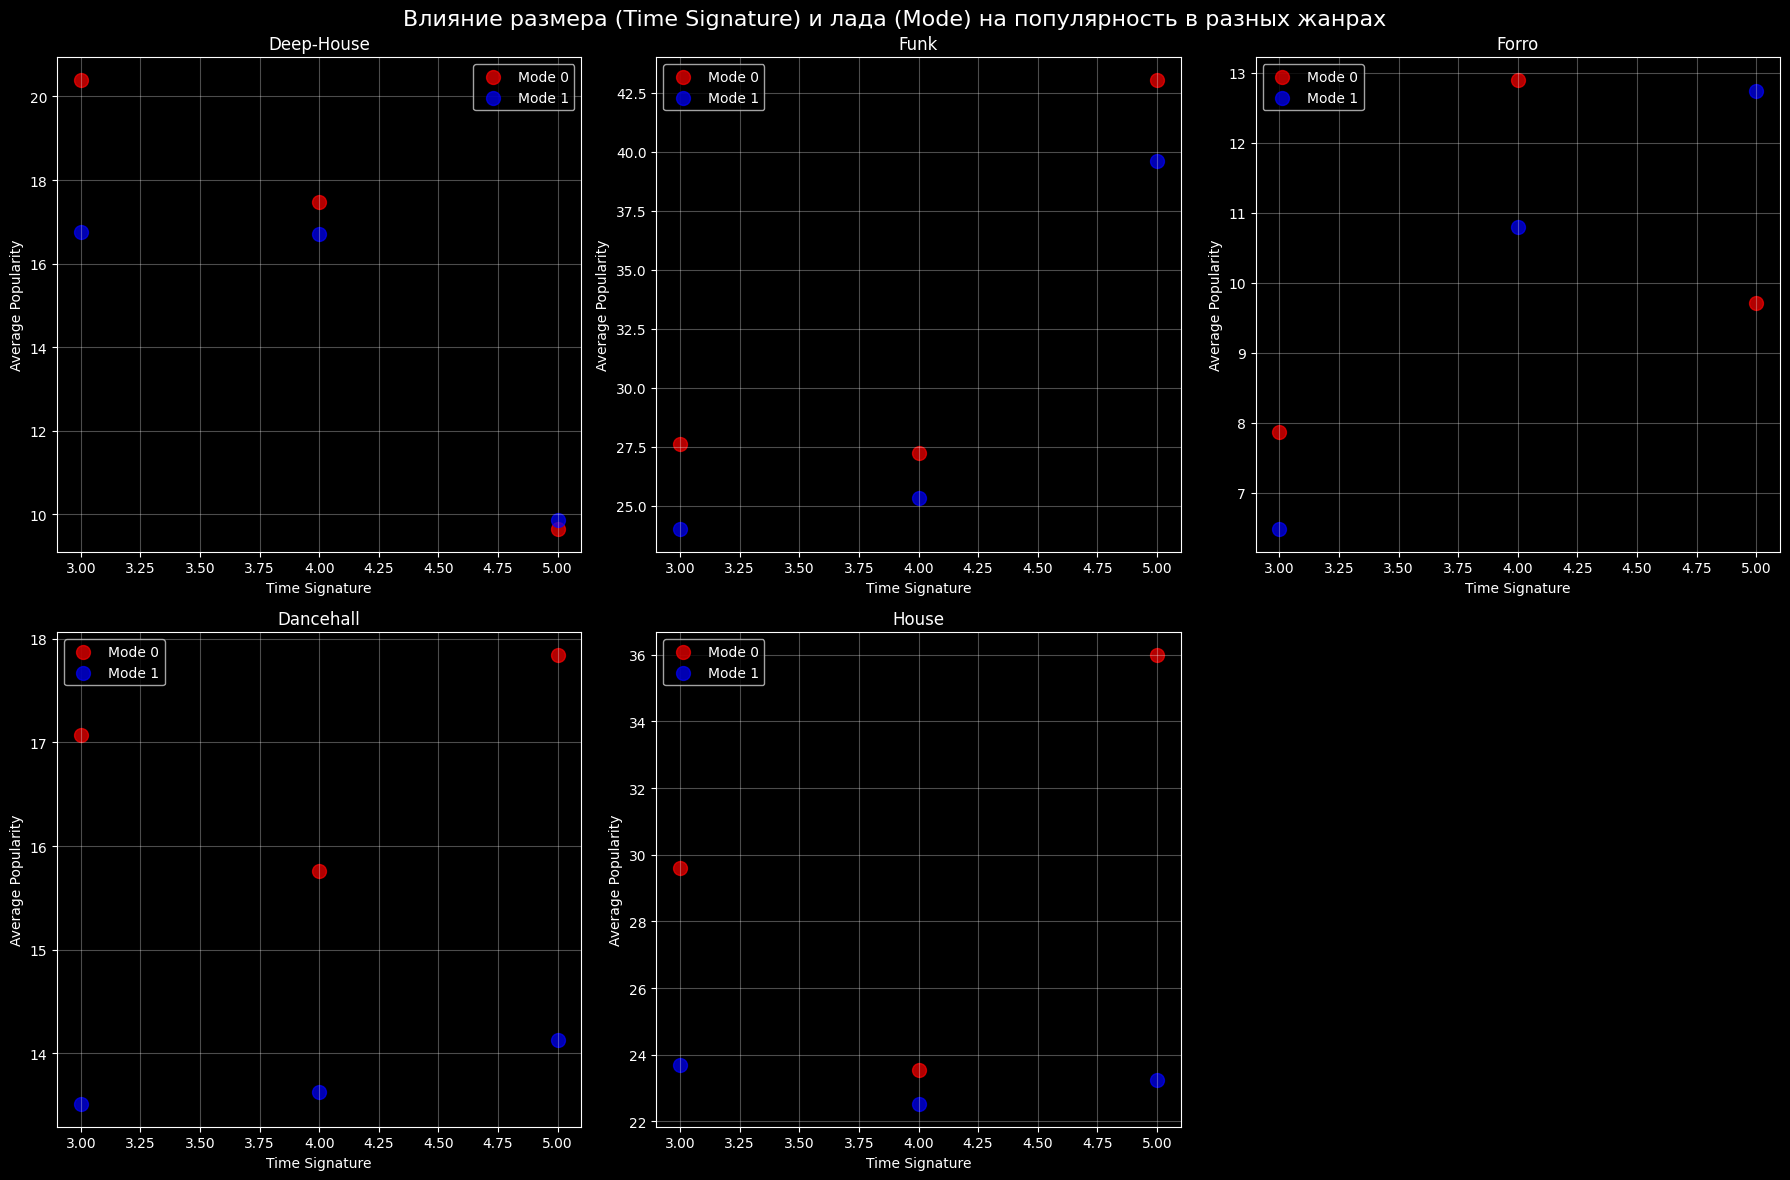

In [ ]:
# Создаем фигуру
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Цвета для разных ладов
colors = {0: "red", 1: "blue"}

for i, genre in enumerate(selected_genres):
  genre_subset = grouped[grouped["genre"] == genre]

  # Создаем точечный график для каждого жанра
  for mode_val in [0, 1]:
    mode_data = genre_subset[genre_subset["mode"] == mode_val]
    axes[i].scatter(
      mode_data["time_signature"],
      mode_data["popularity"],
      c=colors[mode_val],
      label=f"Mode {mode_val}",
      s=100,
      alpha=0.7,
    )

  axes[i].set_xlabel("Time Signature")
  axes[i].set_ylabel("Average Popularity")
  axes[i].set_title(f"{genre.title()}")
  axes[i].legend()
  axes[i].grid(True, alpha=0.3)

# Убираем лишний subplot
if len(selected_genres) < 6:
  axes[5].set_visible(False)

plt.suptitle(
  "Влияние размера (Time Signature) и лада (Mode) на популярность в разных жанрах",
  fontsize=16,
)

plt.tight_layout()
plt.show()

### 6. Как выглядят графики плотности распределения, построенные для темпа по уникальным значениям размера трека? Как выглядят графики плотности нормальных распределений по этим данным?

**Результат**: Код, реализующий графики распределения темпа (tempo) для всех уникальных значений размера трека (time_signature).

Фигура должна иметь название и легенду. Плотности распределения должны быть построены либо на одном графике, либо на нескольких графиках, но в рамках одной фигуры. Плотности нормального распределения должны быть построены в одной на одном графике с плотностью распределения tempo.

**Дополнительно**: Код с ответом на вопрос, какие параметры (среднее и разброс) для нормальных распределений темпа для размера трека.


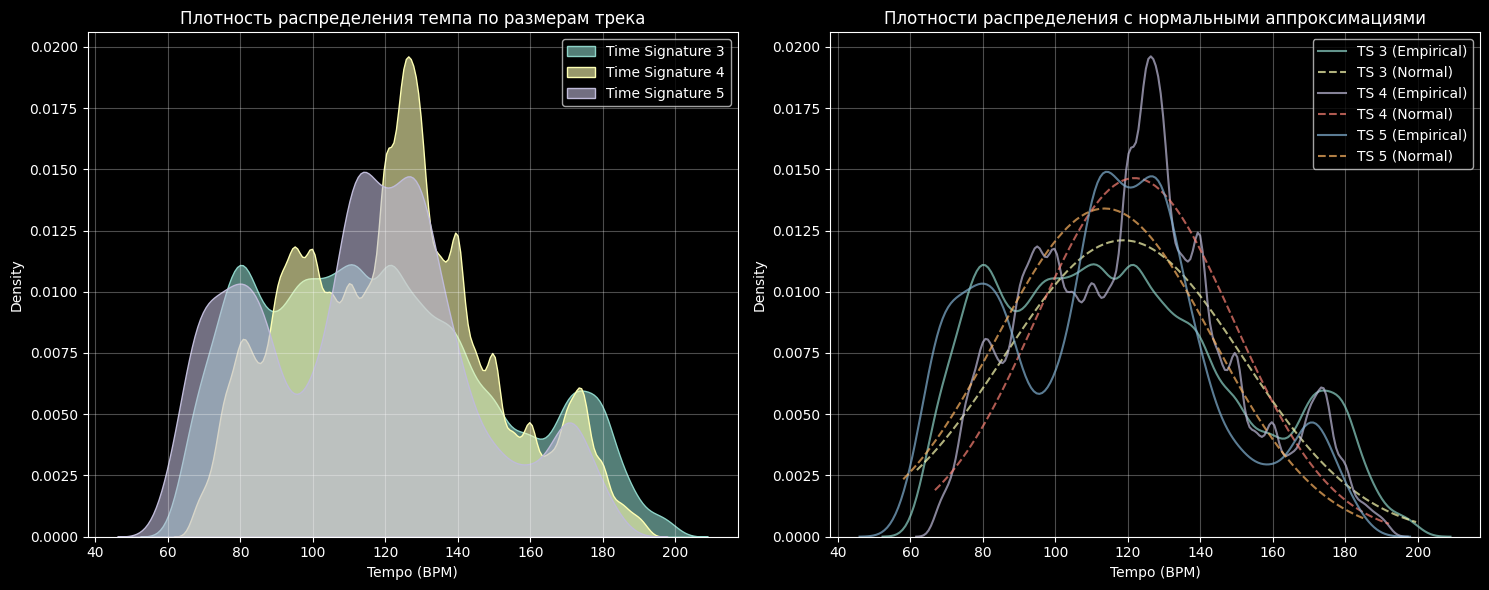

Параметры нормальных распределений темпа для каждого размера трека:
Time Signature | Среднее (BPM) | Стандартное отклонение
------------------------------------------------------------
            3 |       118.74 |                32.97
            4 |       121.83 |                27.25
            5 |       113.59 |                29.78


In [ ]:
# Получаем уникальные значения размера трека
time_signatures = sorted(df["time_signature"].unique())

# Создаем фигуру
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Плотности распределения
for ts in time_signatures:
  ts_data = df[df["time_signature"] == ts]["tempo"]
  if len(ts_data) > 1:  # Проверяем, что есть достаточно данных
    ts_data_clean = ts_data[
      (ts_data > ts_data.quantile(0.01)) & (ts_data < ts_data.quantile(0.99))
    ]
    sns.kdeplot(ts_data_clean, label=f"Time Signature {ts}", ax=ax1, fill=True, alpha=0.6)

ax1.set_xlabel("Tempo (BPM)")
ax1.set_ylabel("Density")
ax1.set_title("Плотность распределения темпа по размерам трека")
ax1.legend()
ax1.grid(True, alpha=0.3)

# График 2: Плотности распределения с наложенными нормальными распределениями
for ts in time_signatures:
  ts_data = df[df["time_signature"] == ts]["tempo"]
  if len(ts_data) > 1:
    ts_data_clean = ts_data[
      (ts_data > ts_data.quantile(0.01)) & (ts_data < ts_data.quantile(0.99))
    ]

    # Эмпирическая плотность
    sns.kdeplot(ts_data_clean, label=f"TS {ts} (Empirical)", ax=ax2, alpha=0.7)

    # Нормальное распределение
    mean = ts_data_clean.mean()
    std = ts_data_clean.std()
    x = np.linspace(ts_data_clean.min(), ts_data_clean.max(), 100)
    y = stats.norm.pdf(x, mean, std)
    ax2.plot(x, y, "--", label=f"TS {ts} (Normal)", alpha=0.7)

ax2.set_xlabel("Tempo (BPM)")
ax2.set_ylabel("Density")
ax2.set_title("Плотности распределения с нормальными аппроксимациями")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Вычисляем параметры нормальных распределений
print("Параметры нормальных распределений темпа для каждого размера трека:")
print("Time Signature | Среднее (BPM) | Стандартное отклонение")
print("-" * 60)
for ts in time_signatures:
  ts_data = df[df["time_signature"] == ts]["tempo"]
  if len(ts_data) > 1:
    ts_data_clean = ts_data[
      (ts_data > ts_data.quantile(0.01)) & (ts_data < ts_data.quantile(0.99))
    ]
    mean = ts_data_clean.mean()
    std = ts_data_clean.std()
    print(f"{ts:13} | {mean:12.2f} | {std:20.2f}")

### 7. Проанализируйте популярность одного артиста (группы) с 10-100 треками на Ваш выбор.

**Результат**: Код, реализующий следующие графики:

- График, отражающий динамику суммарной популярности артиста год от года. Укажите стрелками с подписями, благодаря каким треками артист был на пике и на дне популярности.
- Сопоставьте признаки для этих двух треков, в виде графиков на Ваш выбор. Укажите, какие из признаков вероятнее всего оказали наибольшее влияние на популярность выбранных треков.

Графики должны находится в одной фигуре, имеющей название. Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.


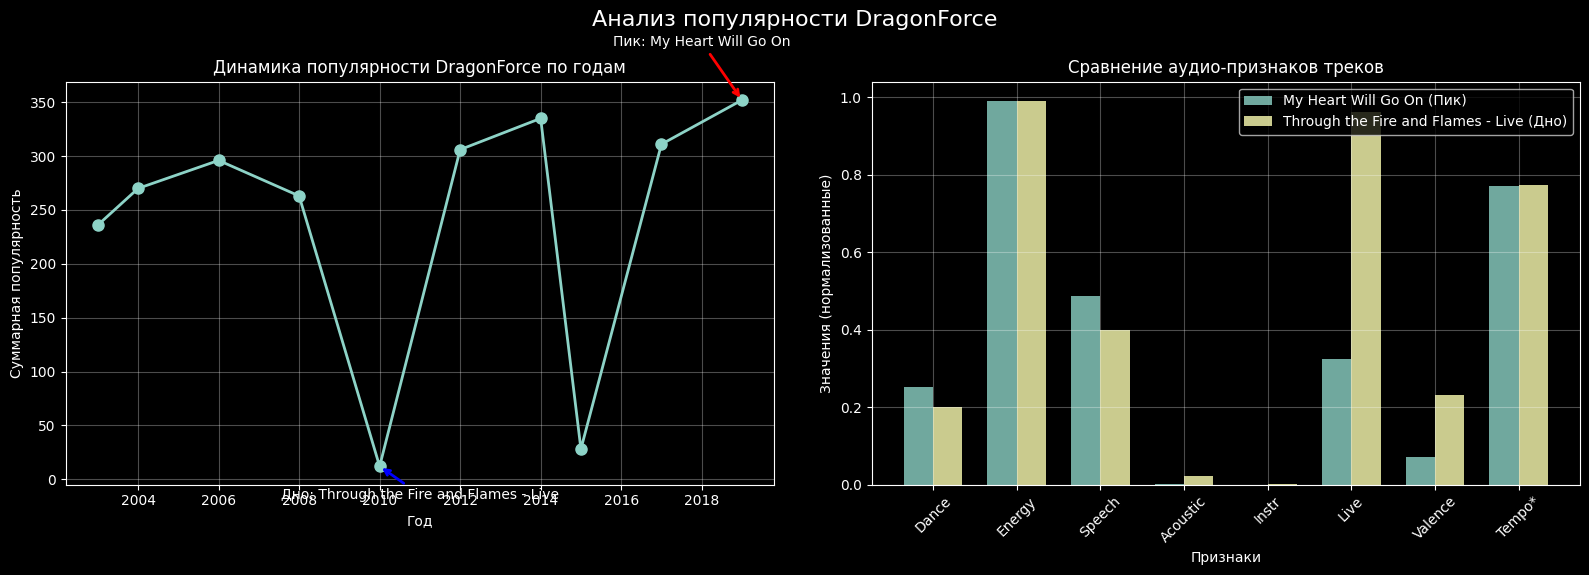


Анализ влияния признаков на популярность:
Пиковый трек: My Heart Will Go On (2019) - Популярность: 42
Трек в дне: Through the Fire and Flames - Live (2010) - Популярность: 12

Наибольшие различия в признаках:
- liveness: разница = 0.636
- valence: разница = 0.160
- speechiness: разница = 0.086

Вероятнее всего, наибольшее влияние на популярность оказали эти три признака.


In [ ]:
# Выбираем данные DragonForce
dragonforce_data = df[df["artist_name"] == "DragonForce"].copy()

# Проверяем, есть ли данные
if len(dragonforce_data) == 0:
  print("Артист DragonForce не найден в датасете. Выберите другого артиста.")

else:
  # Группируем по годам и вычисляем суммарную популярность
  yearly_popularity = dragonforce_data.groupby("year")["popularity"].sum().reset_index()

  # Находим пик и дно популярности
  peak_year = yearly_popularity.loc[yearly_popularity["popularity"].idxmax()]
  bottom_year = yearly_popularity.loc[yearly_popularity["popularity"].idxmin()]

  # Находим треки в годы пика и дна
  peak_tracks = dragonforce_data[dragonforce_data["year"] == peak_year["year"]]
  bottom_tracks = dragonforce_data[dragonforce_data["year"] == bottom_year["year"]]

  # Самый популярный и наименее популярный треки
  peak_track = peak_tracks.loc[peak_tracks["popularity"].idxmax()]
  bottom_track = bottom_tracks.loc[bottom_tracks["popularity"].idxmin()]

  # Создаем фигуру с двумя графиками
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  # График 1: Динамика популярности
  ax1.plot(
    yearly_popularity["year"],
    yearly_popularity["popularity"],
    marker="o",
    linewidth=2,
    markersize=8,
  )

  # Добавляем стрелки для пика и дна
  ax1.annotate(
    f"Пик: {peak_track['track_name']}",
    xy=(peak_year["year"], peak_year["popularity"]),
    xytext=(peak_year["year"] - 1, peak_year["popularity"] + 50),
    arrowprops=dict(arrowstyle="->", color="red", lw=2),
    fontsize=10,
    ha="center",
  )

  ax1.annotate(
    f"Дно: {bottom_track['track_name']}",
    xy=(bottom_year["year"], bottom_year["popularity"]),
    xytext=(bottom_year["year"] + 1, bottom_year["popularity"] - 30),
    arrowprops=dict(arrowstyle="->", color="blue", lw=2),
    fontsize=10,
    ha="center",
  )

  ax1.set_xlabel("Год")
  ax1.set_ylabel("Суммарная популярность")
  ax1.set_title("Динамика популярности DragonForce по годам")
  ax1.grid(True, alpha=0.3)

  # График 2: Сравнение признаков треков
  features = [
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo_norm",
  ]

  # Нормализуем темп для сравнения
  peak_tempo_norm = (peak_track["tempo"] - df["tempo"].min()) / (
    df["tempo"].max() - df["tempo"].min()
  )
  bottom_tempo_norm = (bottom_track["tempo"] - df["tempo"].min()) / (
    df["tempo"].max() - df["tempo"].min()
  )

  peak_values = [
    peak_track["danceability"],
    peak_track["energy"],
    peak_track["speechiness"],
    peak_track["acousticness"],
    peak_track["instrumentalness"],
    peak_track["liveness"],
    peak_track["valence"],
    peak_tempo_norm,
  ]

  bottom_values = [
    bottom_track["danceability"],
    bottom_track["energy"],
    bottom_track["speechiness"],
    bottom_track["acousticness"],
    bottom_track["instrumentalness"],
    bottom_track["liveness"],
    bottom_track["valence"],
    bottom_tempo_norm,
  ]

  x = np.arange(len(features))
  width = 0.35

  ax2.bar(
    x - width / 2,
    peak_values,
    width,
    label=f"{peak_track['track_name']} (Пик)",
    alpha=0.8,
  )
  ax2.bar(
    x + width / 2,
    bottom_values,
    width,
    label=f"{bottom_track['track_name']} (Дно)",
    alpha=0.8,
  )

  ax2.set_xlabel("Признаки")
  ax2.set_ylabel("Значения (нормализованные)")
  ax2.set_title("Сравнение аудио-признаков треков")
  ax2.set_xticks(x)
  ax2.set_xticklabels(
    ["Dance", "Energy", "Speech", "Acoustic", "Instr", "Live", "Valence", "Tempo*"],
    rotation=45,
  )
  ax2.legend()
  ax2.grid(True, alpha=0.3)

  plt.suptitle("Анализ популярности DragonForce", fontsize=16, y=0.95)
  plt.tight_layout()
  plt.show()

  # Анализ влияния признаков
  print("\nАнализ влияния признаков на популярность:")
  print(
    f"Пиковый трек: {peak_track['track_name']} ({peak_track['year']}) - Популярность: {peak_track['popularity']}"
  )
  print(
    f"Трек в дне: {bottom_track['track_name']} ({bottom_track['year']}) - Популярность: {bottom_track['popularity']}"
  )
  print("\nНаибольшие различия в признаках:")

  # Вычисляем различия
  differences = {}
  for i, feature in enumerate(
    [
      "danceability",
      "energy",
      "speechiness",
      "acousticness",
      "instrumentalness",
      "liveness",
      "valence",
    ]
  ):
    diff = abs(peak_values[i] - bottom_values[i])
    differences[feature] = diff

  # Сортируем по убыванию различий
  sorted_differences = sorted(differences.items(), key=lambda x: x[1], reverse=True)

  for feature, diff in sorted_differences[:3]:
    print(f"- {feature}: разница = {diff:.3f}")

  print("\nВероятнее всего, наибольшее влияние на популярность оказали эти три признака.")